In [2]:
### Plot the distribution of NR remap peaks on a genomic meta exon

## Packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
from pathlib import Path
import collections
from scipy.interpolate import interp1d
matplotlib.rcParams['pdf.fonttype'] = 42

## Functions
def summit_distribution(file, species):
    result = {}
    with open(file) as f:
        for line in f:
            strand = line.strip().split()[5]
            exon_start = line.strip().split()[1]
            exon_end = line.strip().split()[2]
            if species == "hg":
                peak = line.strip().split()[15]
            else:
                peak = line.strip().split()[8]

            size_exon = int(exon_end) - int(exon_start)
            middle_exon = int(exon_start) + round(size_exon/2)

            if strand == "-": #we need to reverse the neg strand results based on the exon
                # peak behind exon
                if int(peak) < middle_exon:
                    perc_place = middle_exon - int(peak) #reversed 

                    if perc_place not in result:
                        result[perc_place] = 1
                    else:
                        result[perc_place] += 1

                # peak in front of exon
                elif int(peak) >= middle_exon:
                    place_peak = int(peak) - middle_exon

                    perc_place = 0-place_peak #reversed


                    if perc_place not in result:
                        result[perc_place] = 1
                    else:
                        result[perc_place] += 1

            #strand + is no change            
            else:
                # peak behind exon
                if int(peak) < middle_exon:
                    place_peak = middle_exon - int(peak)
                    perc_place = 0-place_peak

                    if perc_place not in result:
                        result[perc_place] = 1
                    else:
                        result[perc_place] += 1

                # peak in front of exon
                elif int(peak) >= middle_exon:
                    perc_place = int(peak) - middle_exon

                    if perc_place not in result:
                        result[perc_place] = 1
                    else:
                        result[perc_place] += 1
    
    # Filter extremes result (on the sides) for better plotting
    result_filtered = {}
    if species == "hg" or species == "mm":
        cutoff = -1000
    else:
        cutoff = -400 #dm and atha

    for key,item in result.items():
        if key < cutoff or key > abs(cutoff):  
            continue
        else:
            result_filtered[key]=item
    
    return result_filtered

In [ ]:
### Compute distribution (all overlap are with extended coordiante to have a proper distribution on and around the gene
hg38_tss = summit_distribution("hgtss_ovlp","hg")
mm39_tss = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/mmtss_ovlp","mm")
dm6_tss = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/dmtss_ovlp","dm")
tair10_tss = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/tairtss_ovlp","tair")

hg38_tes = summit_distribution("hgtes_ovlp","hg")
mm39_tes = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/mmtes_ovlp","mm")
dm6_tes = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/dmtes_ovlp","dm")
tair10_tes = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/tairtes_ovlp","tair")

hg38_middle = summit_distribution("hg_middle_ovlp","hg")  
mm39_middle = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/mm_middle_ovlp","mm")
dm6_middle = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/dm_middle_ovlp","dm")
tair10_middle = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/tair_middle_ovlp","tair")

hg38_tss_control = summit_distribution("hgtss_ovlp_ctrl","hg")
mm39_tss_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/mmtss_ovlp_ctrl","mm")
dm6_tss_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/dmtss_ovlp_ctrl","dm")
tair10_tss_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/tairtss_ovlp_ctrl","tair")

hg38_tes_control = summit_distribution("hgtes_ovlp_ctrl","hg")
mm39_tes_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/mmtes_ovlp_ctrl","mm")
dm6_tes_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/dmtes_ovlp_ctrl","dm")
tair10_tes_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/tairtes_ovlp_ctrl","tair")

hg38_middle_control = summit_distribution("hg_middle_ovlp_ctrl","hg")
mm39_middle_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/mm_middle_ovlp_ctrl","mm")
dm6_middle_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/dm_middle_ovlp_ctrl","dm")
tair10_middle_control = summit_distribution("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/1_overlap_remap/along_gene/tair_middle_ovlp_ctrl","tair")

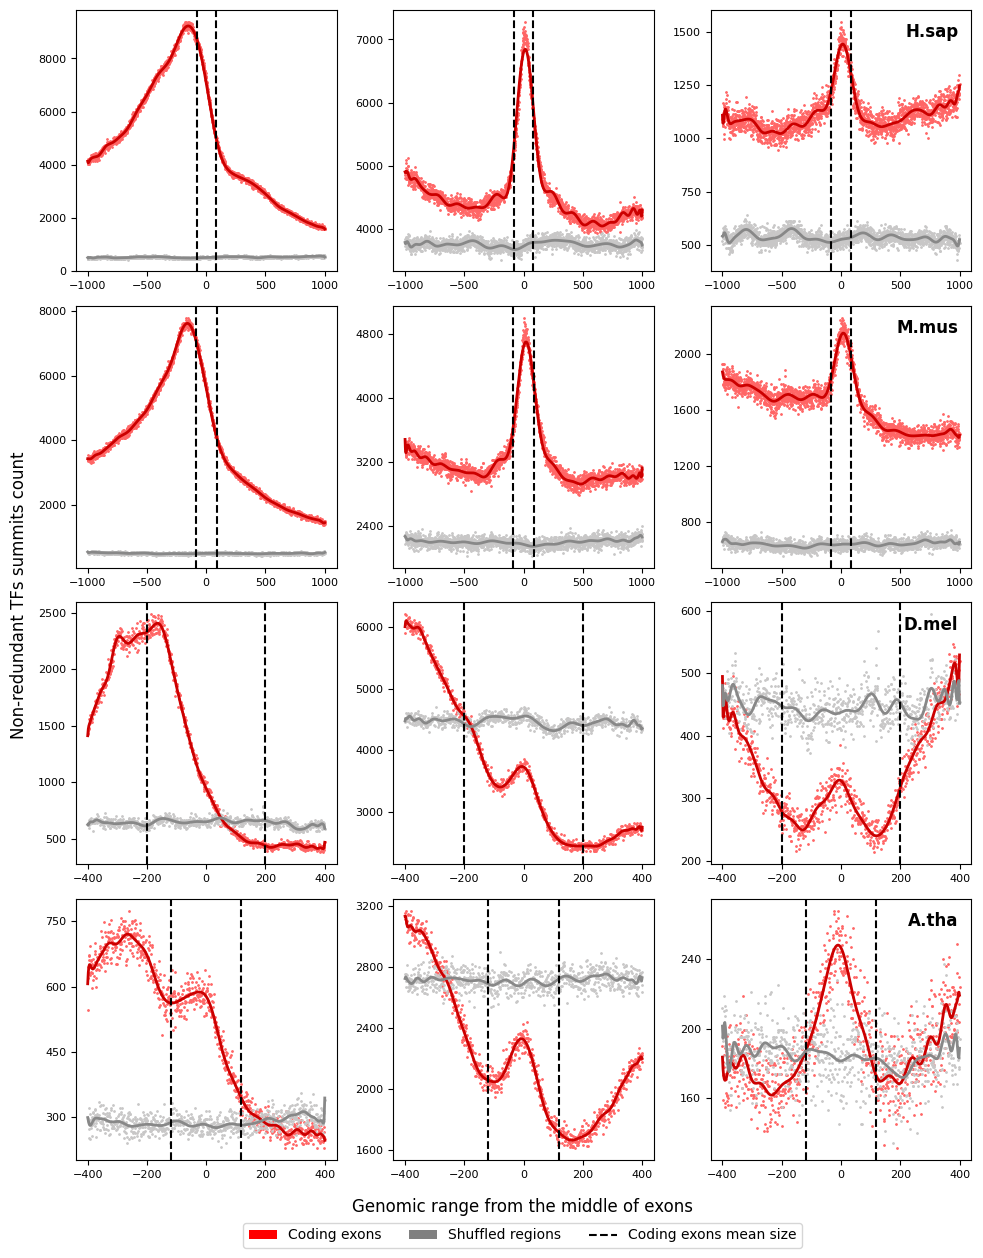

In [7]:
species_data = [
    [ 
        (hg38_tss, hg38_tss_control,    "hg38 TSS"), 
        (hg38_middle, hg38_middle_control, "hg38 Middle"),
        (hg38_tes, hg38_tes_control,    "hg38 TES"), 
      
    ],
    [ 
        (mm39_tss, mm39_tss_control,    "mm39 TSS"), 
        (mm39_middle, mm39_middle_control, "mm39 Middle"),
        (mm39_tes, mm39_tes_control,    "mm39 TES"), 
      
    ],
    [ 
        (dm6_tss, dm6_tss_control,      "dm6 TSS"), 
        (dm6_middle, dm6_middle_control,   "dm6 Middle"),
        (dm6_tes, dm6_tes_control,      "dm6 TES"), 
    ],
    [ 
        (tair10_tss, tair10_tss_control,      "tair10 TSS"), 
        (tair10_middle, tair10_middle_control,   "tair10 Middle"),
        (tair10_tes, tair10_tes_control,      "tair10 TES"), 
      
    ],
]

#################################
# 3. HELPER FUNCTION TO PLOT ONE PAIR
#################################
def plot_pair(ax, analysis_dict, control_dict, species, title="", poly_order=33):
    """
    ax            : the matplotlib axes to plot into
    analysis_dict : dictionary for 'analysis coverage'
    control_dict  : dictionary for 'control coverage'
    title         : subplot title
    poly_order    : polynomial order for np.polyfit
    """
    # 1) Fit + plot analysis
    x_analysis = list(analysis_dict.keys())
    y_analysis = list(analysis_dict.values())
    if len(x_analysis) > poly_order:  # ensure enough points to fit
        model_analysis = np.poly1d(np.polyfit(x_analysis, y_analysis, poly_order))
    else:
        # fallback: lower-order fit or direct connect
        model_analysis = None

    # 2) Fit + plot control
    x_control = list(control_dict.keys())
    y_control = list(control_dict.values())
    if len(x_control) > poly_order:
        model_control = np.poly1d(np.polyfit(x_control, y_control, poly_order))
    else:
        model_control = None

    # 3) Scatter raw points
    ax.scatter(x_analysis, y_analysis, color="#FF6666", s=1, label='Analysis points')
    if species == "H.sap" or species == "M.mus":
        cutoff = 1000
    else:
        cutoff = 400
    if model_analysis:
        myline = np.linspace(min(x_analysis), max(x_analysis), cutoff) #1000 for hsap and mm; 400 for dm and tair
        ax.plot(myline, model_analysis(myline), color="#CC0000", label='Analysis coverage', linewidth=2)

    ax.scatter(x_control, y_control, color="#c8c7c7", s=1, label='Control points')
    if model_control:
        myline2 = np.linspace(min(x_control), max(x_control), cutoff)
        ax.plot(myline2, model_control(myline2), color="#888888", label='Control coverage', linewidth=2)

    # Example vertical lines (adjust to your data)
    #Hsap is 164 so 82; Dmel is 400 so 200; Mmus is 177 so 88; Atha is 239 so 119
    if species == "H.sap":
        mean_exon_size = -82
    elif species == "M.mus":
        mean_exon_size = -88
    elif species == "D.mel":
        mean_exon_size = -200
    else:
        mean_exon_size = -119

    ax.axvline(x=abs(mean_exon_size),  color='k', linestyle='--', label='Mean size boundary')
    ax.axvline(x=mean_exon_size, color='k', linestyle='--')


#################################
# 4. CREATE THE SUBPLOTS
#################################
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MaxNLocator

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 12), sharey=False)
# - 4 rows, 3 columns -> 12 subplots
# - sharey=True means all subplots share the same y-scale

species_names = ["H.sap", "M.mus", "D.mel", "A.tha"]
# Loop over each row (species) and each column (region)
for row_idx, species_row in enumerate(species_data):
    for col_idx, (analysis_dict, control_dict, subplot_title) in enumerate(species_row):
        ax = axes[row_idx, col_idx]

        plot_pair(ax, analysis_dict, control_dict, species_names[row_idx], title=None)
        
        # y axis ticks 
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        # If you already have an Axes object "ax"
        ax.tick_params(axis='y', labelsize=8)  # Use labelsize=8 (or another number) to reduce font size
        ax.tick_params(axis='x', labelsize=8)

    ## Plot species name 
    ax_coor = axes[row_idx, -1]
    
    # Place text near top-right corner of that Axes
    # (0.95, 0.95) in "axes fraction" coordinates => 95% from the left, 95% from bottom
    ax_coor.text(
        0.95, 0.95,          # x, y in Axes coordinates
        species_names[row_idx],
        transform=ax_coor.transAxes,
        ha='right',          # align text to the right
        va='top',            # align text to the top
        fontsize=12,
        fontweight='bold'
    )


###  Legend and axis title
## X axis
ax_middle_column = axes[-1, 1]
box = ax_middle_column.get_position()
center_x = (box.x0 + box.x1) / 2

#  Manually place a 'global' x-axis label
fig.text(
    center_x+0.02,           # x in figure coords
    -0.01,               # y in figure coords (adjust as needed)
    "Genomic range from the middle of exons",
    ha='center', va='center', fontsize=12
)

## Legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

c1 = Patch(facecolor='red', label="Coding exons")
c2 = Patch(facecolor='gray', label="Shuffled regions")
c3 = Line2D([], [], color='black', linestyle='--', label="Coding exons mean size")

fig.legend(
    handles=[c1, c2, c3],
    loc='lower center', bbox_to_anchor=(center_x+0.02, -0.05),
    ncol=3,
    fontsize=10
)

## Y axis
fig.supylabel("Non-redundant TFs summits count",fontsize=12)

plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/distrib_remap_exons_all_species.pdf", format="pdf", bbox_inches="tight")

plt.show()
